# High Level Questions
 - How is the binning of the FFI/TPFs conducted?
 - What do the quaternion columns in the FITS files represent?  
        -Are there diagnostic values I should be monitoring in FOM/MSTot/GSUsed?
 - Has the quaternion file or values inside evolved over the mission lifetime?

# Notebook Demoing quaternions and highlighting questions regarding the nescessary implementation to use them to de-trend data

In [14]:
import astropy.io.fits as fits
import matplotlib.pyplot as plt
import numpy as np
import lightkurve as lk

# Preamble: documentation questions? 

## We're going to use Pi Men C as a test target as it has observations across a number of sectors.  
### We'll start with sector 39 / camera 3 / ccd 4 - pre-downloaded some data to test

In [2]:
datadir = 'test'
f_ffitpf  = 'tess-s0039-3-4_84.291214_-80.469124_10x20_astrocut.fits'
f_fasttpf = 'tess2021146024351-s0039-0000000261136679-0210-a_fast-tp.fits'
f_slowtpf = 'tess2021146024351-s0039-0000000261136679-0210-s_tp.fits'
f_quat    = 'tess2021176110401_sector39-quat.fits'
f_flc     = 'tess2021146024351-s0039-0000000261136679-0210-a_fast-lc.fits'

In [3]:
hdu_ffi  = fits.open('{}/{}'.format(datadir,f_ffitpf))
hdu_ftpf = fits.open('{}/{}'.format(datadir,f_fasttpf))
hdu_stpf = fits.open('{}/{}'.format(datadir,f_slowtpf))
hdu_quat = fits.open('{}/{}'.format(datadir,f_quat))

hdu_ffi  = fits.open('{}/{}'.format(datadir,f_ffitpf))
hdu_ftpf = fits.open('{}/{}'.format(datadir,f_fasttpf))
hdu_stpf = fits.open('{}/{}'.format(datadir,f_slowtpf))
hdu_quat = fits.open('{}/{}'.format(datadir,f_quat))

data_ffi  = hdu_ffi[1].data
data_ftpf = hdu_ftpf[1].data
data_stpf = hdu_stpf[1].data
data_quat = hdu_quat[3].data

## Question #1: Are the quaternion timestamps the barycentric light arrival time  of the 2-s raw exposures they are calculated from?  
 - E.g. TIME-TIMECORR FROM TPF/FFI TIMESTAMPS
 - Or are they the midpoint of two raw exposures because they are calculated from the change in position?

Text(0.5, 1.0, 'End of Orbit Gap')

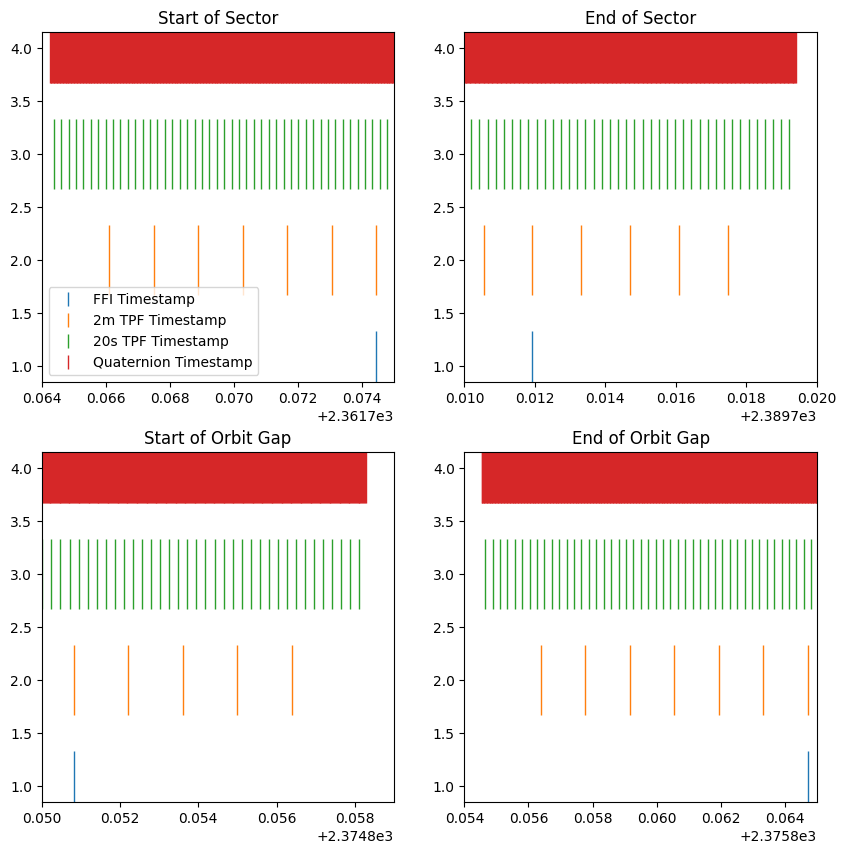

In [4]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2,2,figsize=(10,10))
# Start of sector
ax1.plot(data_ffi['TIME']-data_ffi['TIMECORR'],[1] * len(data_ffi['TIME']),
         linestyle='None',marker='|',ms=50,label="FFI Timestamp")
ax1.plot(data_stpf['TIME']-data_stpf['TIMECORR'],[2] * len(data_stpf['TIME']),
         linestyle='None',marker='|',ms=50,label="2m TPF Timestamp")
ax1.plot(data_ftpf['TIME']-data_ftpf['TIMECORR'],[3] * len(data_ftpf['TIME']),
         linestyle='None',marker='|',ms=50,label="20s TPF Timestamp")
ax1.plot(data_quat['TIME'],[4] * len(data_quat['TIME']),
         linestyle='None',marker='|',ms=50,label="Quaternion Timestamp")
ax1.set_xlim(2361.764,2361.775)
ax1.set_title("Start of Sector")
ax1.legend(markerscale=0.2)
# End of sector
ax2.plot(data_ffi['TIME']-data_ffi['TIMECORR'],[1] * len(data_ffi['TIME']),linestyle='None',marker='|',ms=50)
ax2.plot(data_stpf['TIME']-data_stpf['TIMECORR'],[2] * len(data_stpf['TIME']),linestyle='None',marker='|',ms=50)
ax2.plot(data_ftpf['TIME']-data_ftpf['TIMECORR'],[3] * len(data_ftpf['TIME']),linestyle='None',marker='|',ms=50)
ax2.plot(data_quat['TIME'],[4] * len(data_quat['TIME']),linestyle='None',marker='|',ms=50)
ax2.set_xlim(2389.710,2389.72)
ax2.set_title("End of Sector")
# Start of Orbit Gap
ax3.plot(data_ffi['TIME']-data_ffi['TIMECORR'],[1] * len(data_ffi['TIME']),linestyle='None',marker='|',ms=50)
ax3.plot(data_stpf['TIME']-data_stpf['TIMECORR'],[2] * len(data_stpf['TIME']),linestyle='None',marker='|',ms=50)
ax3.plot(data_ftpf['TIME']-data_ftpf['TIMECORR'],[3] * len(data_ftpf['TIME']),linestyle='None',marker='|',ms=50)
ax3.plot(data_quat['TIME'],[4] * len(data_quat['TIME']),linestyle='None',marker='|',ms=50)
ax3.set_xlim(2374.85,2374.859)
ax3.set_title("Start of Orbit Gap")

# End of Orbit Gap 
ax4.plot(data_ffi['TIME']-data_ffi['TIMECORR'],[1] * len(data_ffi['TIME']),linestyle='None',marker='|',ms=50)
ax4.plot(data_stpf['TIME']-data_stpf['TIMECORR'],[2] * len(data_stpf['TIME']),linestyle='None',marker='|',ms=50)
ax4.plot(data_ftpf['TIME']-data_ftpf['TIMECORR'],[3] * len(data_ftpf['TIME']),linestyle='None',marker='|',ms=50)
ax4.plot(data_quat['TIME'],[4] * len(data_quat['TIME']),linestyle='None',marker='|',ms=50)
ax4.set_xlim(2375.854,2375.865)
ax4.set_title("End of Orbit Gap")



## Question #2: Are the 20s/2-min/FFI lightcurve timestamps the mid-point of the tpf/ffi exposure? 
 - E.g. (tmax+tmin) / 2 ?
 - It looks like the quaternions timestamps are equal to that of the 2-s raw exposures
 - It looks like the TPF/FFI timestamps the midpoint of the 2-s exposure time-series that are binned together into the TPF/FFI?  
 - Want to confirm.  

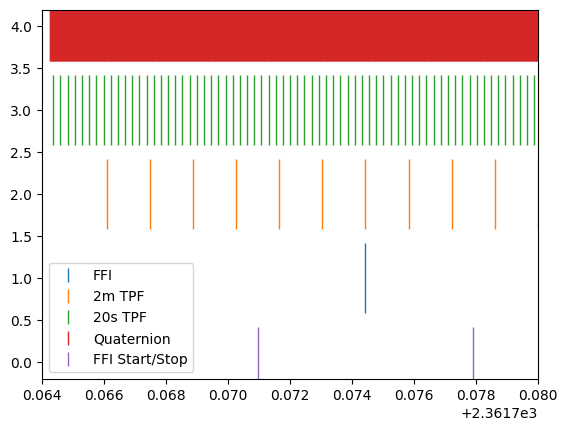

In [5]:
# Lets grab the lowest ffi and check the time indexing
#curl -C - -L -o tess2021147062904-s0039-3-4-0210-s_ffic.fits https://mast.stsci.edu/api/v0.1/Download/file/?uri=mast:TESS/product/tess2021147062904-s0039-3-4-0210-s_ffic.fits

TSTART  =    2361.772533753001 #/ observation start time in BTJD   From the above FFI              
TSTOP   =    2361.779477962803 #/ observation stop time in BTJD    From the above FFI

# Start of sector
plt.plot(data_ffi['TIME']-data_ffi['TIMECORR'],[1] * len(data_ffi['TIME']),
         linestyle='None',marker='|',ms=50,label="FFI")
plt.plot(data_stpf['TIME']-data_stpf['TIMECORR'],[2] * len(data_stpf['TIME']),
         linestyle='None',marker='|',ms=50, label="2m TPF")
plt.plot(data_ftpf['TIME']-data_ftpf['TIMECORR'],[3] * len(data_ftpf['TIME']),
         linestyle='None',marker='|',ms=50, label="20s TPF")
plt.plot(data_quat['TIME'],[4] * len(data_quat['TIME']),
         linestyle='None',marker='|',ms=50, label="Quaternion")
plt.plot([TSTART,TSTOP]-data_ffi['TIMECORR'][0],[0] * 2,
         linestyle='None',marker='|',ms=50, label="FFI Start/Stop")

plt.xlim(2361.764,2361.78)
plt.legend(markerscale=0.2)


# Allright, Assuming the above is true then, we'll bin all the quaternions that are +/- texp/2 from the TPF/FFI timestamp

## Question 3: Using exposure time / 2 is accurate enough for binning correct? 
   - Want to check that there are no issues with relatavistic corrections (etc) here

## Question 4 - is the exposure time of an epoch stored in the header at all?  It would be nicer to fully automate this process rather than having a separate lookup table for what a product's exposure time is by sector. 
 - Alternatively, is this queryable at all online?  
     - E.g. if I know the sector and the product type, can I fetch this value trivially online?
     - Would like this to be automatic and not hard coded for CI as new sectors/cycles continue
     - Should we create this somewhere if it does not exist rather than incorporate it as a table in this?
## Question 5 - Are there ever gaps in raw exposures in the middle of sectors?
 - I'm assuming right now that the quaternion isn't min,max ind % (iter, iter+1) * nquat/exp because there are going to be occasional rare gaps with data loss, offsets around orbit gaps etc and this should be robust at the expense of processing time because it will only be run once

In [15]:
# Ok, this can be improved efficiency wise but its proof of concept (hopefully)
# Thought - estimate and verify - use exposure time source to estimate min, max indices for the quat 
# then check to drastically reduce processing time as you will check ~1-2 x (exp time / 2s) worth of indices 
# not a sectors worth
# or, keep a runing tally of min,max ind where min_new=old_max+1 and pass this along 
def bin_quats_mask(obs_stamp,obs_exp,quat_arr):
    # obs_stamp in btjd
    # quat_arr in btjd
    # obs_exp in fractional days 
    mask = np.ma.masked_where(abs(quat_arr-obs_stamp) > 0.5*obs_exp,quat_arr,copy=True)
    return mask

quat_timestamps=np.array(data_quat['TIME'])
ffi_timestamps=np.array(data_ffi['TIME']-data_ffi['TIMECORR'])
stpf_timestamps=np.array(data_stpf['TIME']-data_stpf['TIMECORR'])
ftpf_timestamps=np.array(data_ftpf['TIME']-data_ftpf['TIMECORR'])


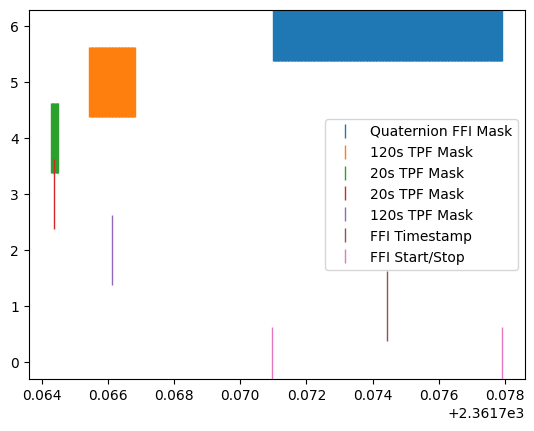

In [16]:
mask_ffi=bin_quats_mask(ffi_timestamps[0], (10./60./24.),quat_timestamps)
mask_stpf=bin_quats_mask(stpf_timestamps[0], (120./60/60./24.),quat_timestamps)
mask_ftpf=bin_quats_mask(ftpf_timestamps[0], (20./60/60./24.),quat_timestamps)

# Start of sector

plt.plot(mask_ffi,[6] * len(mask_ffi),
         linestyle='None',marker='|',ms=50, label="Quaternion FFI Mask")
plt.plot(mask_stpf,[5] * len(mask_stpf),
         linestyle='None',marker='|',ms=50, label="120s TPF Mask")
plt.plot(mask_ftpf,[4] * len(mask_ftpf),
         linestyle='None',marker='|',ms=50, label="20s TPF Mask")
plt.plot(ftpf_timestamps[0],[3] * 1,
         linestyle='None',marker='|',ms=50,label="20s TPF Mask")
plt.plot(stpf_timestamps[0],[2] * 1,
         linestyle='None',marker='|',ms=50,label="120s TPF Mask")
plt.plot(ffi_timestamps[0],[1] * 1,
         linestyle='None',marker='|',ms=50,label="FFI Timestamp")
plt.plot([TSTART,TSTOP]-data_ffi['TIMECORR'][0],[0] * 2,
         linestyle='None',marker='|',ms=50, label="FFI Start/Stop")

#plt.xlim(2361.77,2361.78)

plt.legend(markerscale=0.2)


# Ok, so this all looks ballpark good, lets look at the quaternion values now

In [17]:
hdu_quat.info()
hdu_quat[0].header

Filename: test/tess2021176110401_sector39-quat.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      14   ()      
  1  CAMERA1       1 BinTableHDU     42   1223150R x 12C   [D, D, D, D, D, D, D, D, D, D, D, D]   
  2  CAMERA2       1 BinTableHDU     42   1223139R x 12C   [D, D, D, D, D, D, D, D, D, D, D, D]   
  3  CAMERA3       1 BinTableHDU     42   1223138R x 12C   ['D', 'D', 'D', 'D', 'D', 'D', 'D', 'D', 'D', 'D', 'D', 'D']   
  4  CAMERA4       1 BinTableHDU     42   1223131R x 12C   [D, D, D, D, D, D, D, D, D, D, D, D]   


SIMPLE  =                    T / conforms to FITS standard                      
BITPIX  =                    8 / array data type                                
NAXIS   =                    0 / number of array dimensions                     
EXTEND  =                    T                                                  
ORIGIN  = 'MIT     '           / institution responsible for creating this file 
SECTOR  =                   39 / Observing sector                               
TELESCOP= 'TESS    '           / telescope used to acquire data                 
INSTRUME= 'TESS Photometer'    / identifier for instrument used to acquire data 
DATE    = '2021-06-25'         / date this file was written (yyyy-mm-dd)        
POCVERS = '4ed480d4c2eb51802bbe66cb46e5885d2c2bf6cf' / git hash when code built 
POCCDATE= '2021-04-27 14:35:48 EDT' / date when code built                      
FILENAME= 'eng_fits/tess2021176110401_sector39-quat.fits' / name of file        
CHECKSUM= 'YVkLaTjLYTjLaTjL'

In [9]:
hdu_quat[3].header

XTENSION= 'BINTABLE'           / binary table extension                         
BITPIX  =                    8 / array data type                                
NAXIS   =                    2 / number of array dimensions                     
NAXIS1  =                   96 / length of dimension 1                          
NAXIS2  =              1223138 / length of dimension 2                          
PCOUNT  =                    0 / number of group parameters                     
GCOUNT  =                    1 / number of groups                               
TFIELDS =                   12 / number of table fields                         
TTYPE1  = 'TIME    '                                                            
TFORM1  = 'D       '                                                            
TUNIT1  = 'TJD = BJD-2457000'                                                   
TTYPE2  = 'C3_FOM  '                                                            
TFORM2  = 'D       '        

In [10]:
hdu_quat[3].data[0]

(2360.7712716247956, 236.0, 198.0, 200.0, -0.00016090416048961041, -7.68207660468124e-05, 5.6080872232508996e-05, 0.9999999825316782, -6.348217902683168e-05, 0.00016090416048960415, 7.08273059799279e-05, 0.9999999825316777)

# Question 6: What do the different table columns in the quaternion fits file represent?
My best guess: 

TIME # TESS Light arrival time  
C[1-4]_FOM # Figure of Merit/accuracy?  
C[1-4]_NUM_GSUSED # Number of guidestares used to calculate quaternion/FOM?  
C[1-4]_NUM_MSTOT # total miliseconds guiding?
C[1-4]_Q[1-4] # imaginary pointing value for Q[1-4] component of quaternion pointing vector  
C[1-4]_Q[1-4]_SC # scalar value assosciated with Q[1-4] component  

### Assosciated follow-up questions:
 - Assuming FOM is figure of merit
     - What a good value?  
     - Whats a bad value?  
 - What abous GSUSED, MSTOT
 - Anything else to keep an eye out for or that I should be using as diagnostics?

# Question 7: I've done a quick diagnostic but not a thorough check through all quaternions yet, have there been any changes to this engineering output data throughout the mission that I should be looking out for?
 - I haven't noticed anything yet

/var/folders/2j/khdcttzd5x5gkjnhf9s7jcjwsqp4q_/T/ipykernel_41335/139340461.py:3: LightkurveDeprecationWarning: The SAP_FLUX function is deprecated and may be removed in a future version.
  ax1.plot(lc.SAP_FLUX.time.value - lc.SAP_FLUX.timecorr.value, lc.SAP_FLUX.sap_flux.value)


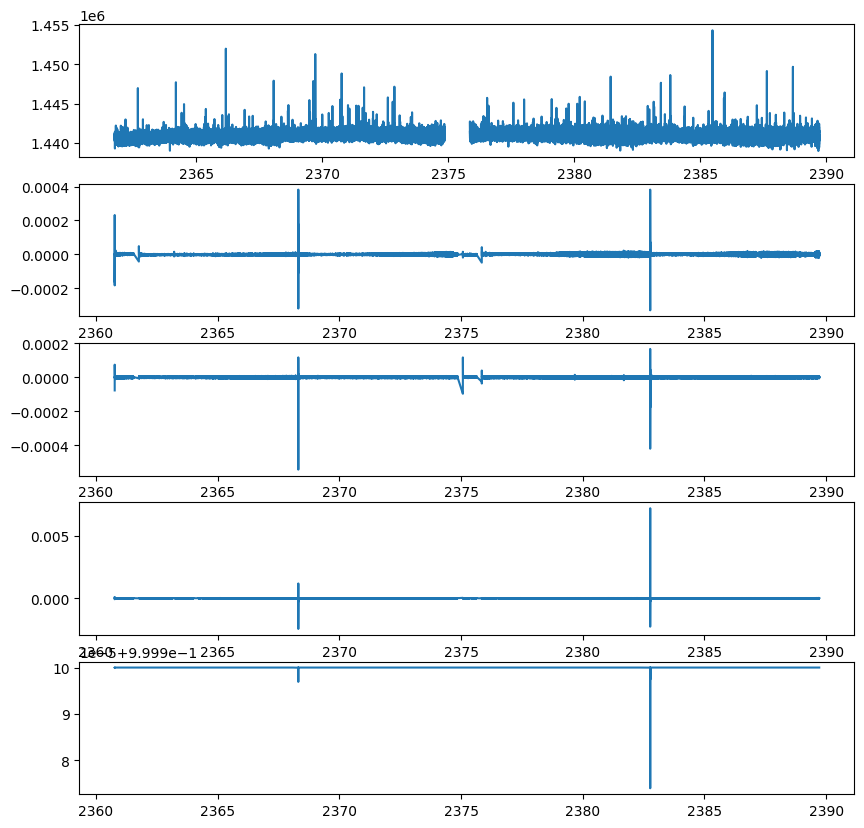

In [22]:
lc=lk.read(f"{datadir}/{f_flc}", quality_bitmask=None)
fig, (ax1, ax2, ax3, ax4, ax5) = plt.subplots(5,1,figsize=(10,10))
ax1.plot(lc.SAP_FLUX.time.value - lc.SAP_FLUX.timecorr.value, lc.SAP_FLUX.sap_flux.value)
ax2.plot(data_quat["TIME"],data_quat["C3_Q1"])
ax3.plot(data_quat["TIME"],data_quat["C3_Q2"])
ax4.plot(data_quat["TIME"],data_quat["C3_Q3"])
ax5.plot(data_quat["TIME"],data_quat["C3_Q4"])

# do an early sector where the quaternions are worse


In [12]:
lc.PDCSAP_FLUX

/var/folders/2j/khdcttzd5x5gkjnhf9s7jcjwsqp4q_/T/ipykernel_41335/2031669604.py:1: LightkurveDeprecationWarning: The PDCSAP_FLUX function is deprecated and may be removed in a future version.
  lc.PDCSAP_FLUX


time,flux,flux_err,timecorr,cadenceno,centroid_col,centroid_row,sap_flux,sap_flux_err,sap_bkg,sap_bkg_err,pdcsap_flux,pdcsap_flux_err,quality,psf_centr1,psf_centr1_err,psf_centr2,psf_centr2_err,mom_centr1,mom_centr1_err,mom_centr2,mom_centr2_err,pos_corr1,pos_corr2
,electron / s,electron / s,d,,pix,pix,electron / s,electron / s,electron / s,electron / s,electron / s,electron / s,,pix,pix,pix,pix,pix,pix,pix,pix,pix,pix
Time,float32,float32,float32,int32,float64,float64,float32,float32,float32,float32,float32,float32,int32,float64,float32,float64,float32,float64,float32,float64,float32,float32,float32
2361.772327319384,1.4679361e+06,2.8468735e+02,1.2403975e-03,4900248,590.05334,290.94911,1.4410371e+06,2.7944678e+02,4.0643884e+03,2.7732635e+01,1.4679361e+06,2.8468735e+02,0,———,———,———,———,590.05334,1.8690273e-04,290.94911,2.8024372e-04,2.3486970e-02,1.0594278e-01
2361.7725588037874,1.4676712e+06,2.8464761e+02,1.2404005e-03,4900249,590.06617,290.93410,1.4409482e+06,2.7940775e+02,3.9700615e+03,2.7476770e+01,1.4676712e+06,2.8464761e+02,0,———,———,———,———,590.06617,1.8679765e-04,290.93410,2.8071750e-04,3.6305308e-02,9.3232140e-02
2361.7727902883066,1.4679441e+06,2.8467331e+02,1.2404036e-03,4900250,590.06770,290.98098,1.4407775e+06,2.7943295e+02,4.0671189e+03,2.7764997e+01,1.4679441e+06,2.8467331e+02,0,———,———,———,———,590.06770,1.8683201e-04,290.98098,2.8069719e-04,3.8380913e-02,1.3995330e-01
2361.773021772826,1.4677242e+06,2.8466327e+02,1.2404068e-03,4900251,590.06514,290.94312,1.4408381e+06,2.7942313e+02,4.0199995e+03,2.7620064e+01,1.4677242e+06,2.8466327e+02,0,———,———,———,———,590.06514,1.8694777e-04,290.94312,2.8092819e-04,3.5188589e-02,1.0289142e-01
2361.773253257229,1.4673354e+06,2.8461591e+02,1.2404098e-03,4900252,590.05172,290.94159,1.4403990e+06,2.7937662e+02,4.0232532e+03,2.7619663e+01,1.4673354e+06,2.8461591e+02,0,———,———,———,———,590.05172,1.8689845e-04,290.94159,2.8054588e-04,2.0518638e-02,9.9651285e-02
2361.7734847417487,1.4680738e+06,2.8469321e+02,1.2404129e-03,4900253,590.04490,290.94619,1.4411992e+06,2.7945251e+02,4.0249353e+03,2.7613850e+01,1.4680738e+06,2.8469321e+02,0,———,———,———,———,590.04490,1.8677759e-04,290.94619,2.8005542e-04,1.5618154e-02,1.0170810e-01
2361.773716226151,1.4677719e+06,2.8466962e+02,1.2404160e-03,4900254,590.07229,290.95073,1.4409686e+06,2.7942935e+02,3.9997981e+03,2.7603121e+01,1.4677719e+06,2.8466962e+02,0,———,———,———,———,590.07229,1.8690823e-04,290.95073,2.8071276e-04,4.3014880e-02,1.0979650e-01
2361.773947710671,1.4676679e+06,2.8467160e+02,1.2404191e-03,4900255,590.06208,290.94878,1.4408140e+06,2.7943130e+02,4.0894377e+03,2.7690289e+01,1.4676679e+06,2.8467160e+02,0,———,———,———,———,590.06208,1.8689057e-04,290.94878,2.8059061e-04,3.3829190e-02,1.0642306e-01
